In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r'C:\Users\Akinbami Abosede\Downloads\user_behavior_dataset.txt',sep=',')
data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


## Data cleaning

In [3]:
data.dropna()
data.drop_duplicates()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


## Data analyzation and visualization

In [5]:
data1=data[data['Operating System']=='Android']
data1

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
...,...,...,...,...,...,...,...,...,...,...,...
694,695,Samsung Galaxy S21,Android,564,9.7,2422,83,1985,34,Female,5
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


<Axes: ylabel='count'>

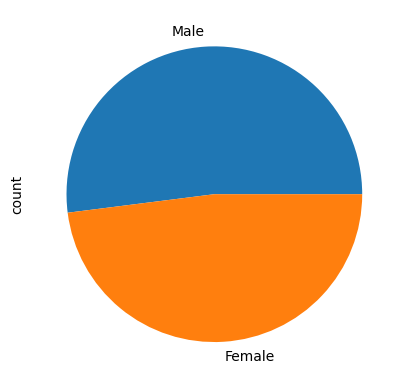

In [21]:
data['Gender'].value_counts().plot(kind='pie')

In [6]:
data1=data[data['Operating System']=='Android']
data1.pivot=data1.pivot_table(index='Gender',columns='Operating System', aggfunc='size')
data1.pivot

Operating System,Android
Gender,
Female,262
Male,292


Text(0, 0.5, '')

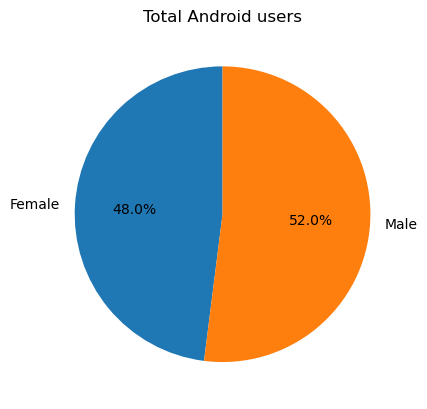

In [7]:
datax=data.groupby('Gender')['Operating System'].count()
datax.plot(kind='pie', startangle=90,autopct="%.1f%%",title='Total Android users')
plt.ylabel(None)

In [8]:
data2=data[data['Operating System']=='iOS']
data2.pivot=data2.pivot_table(index='Gender',columns='Operating System', aggfunc='size')
data2.pivot

Operating System,iOS
Gender,
Female,74
Male,72


Text(0, 0.5, '')

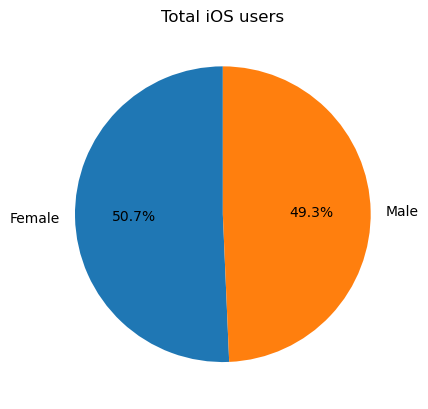

In [9]:
datay=data2.groupby('Gender')['Operating System'].count()
datay.plot(kind='pie', startangle=90,autopct="%.1f%%",title='Total iOS users')
plt.ylabel(None)

In [10]:
data3=data.groupby(['Device Model','Gender'])['App Usage Time (min/day)'].sum()
data3=data3.to_frame()
data3=data3.sort_values(by='App Usage Time (min/day)')
data3

,,App Usage Time (min/day)
Device Model,Gender,
Samsung Galaxy S21,Female,15664
OnePlus 9,Female,16221
Google Pixel 5,Female,17436
Xiaomi Mi 11,Male,18292
OnePlus 9,Male,19740
Samsung Galaxy S21,Male,19770
iPhone 12,Male,20017
Google Pixel 5,Male,20590
Xiaomi Mi 11,Female,20902


<Axes: title={'center': 'Total amount of App Usage Time minute/day'}, ylabel='Device Model,Gender'>

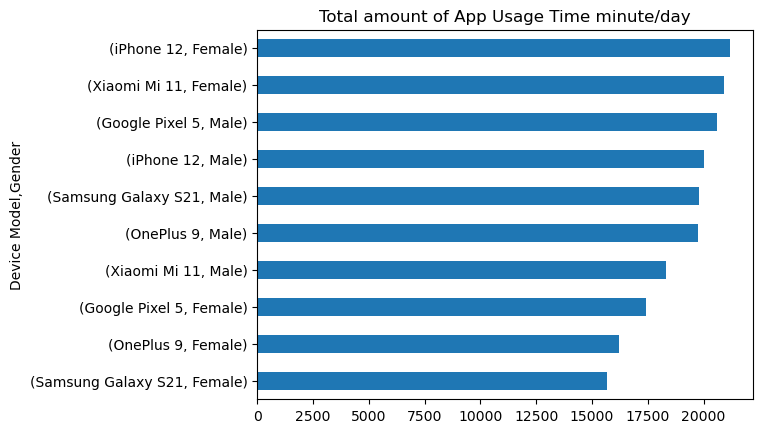

In [11]:
data3.plot(kind='barh',legend=False,title="Total amount of App Usage Time minute/day")

In [12]:
data[['Device Model','Battery Drain (mAh/day)','Data Usage (MB/day)']]

,Device Model,Battery Drain (mAh/day),Data Usage (MB/day)
0,Google Pixel 5,1872,1122
1,OnePlus 9,1331,944
2,Xiaomi Mi 11,761,322
3,Google Pixel 5,1676,871
4,iPhone 12,1367,988
...,...,...,...
695,iPhone 12,1082,381
696,Xiaomi Mi 11,1965,1201
697,Google Pixel 5,942,457
698,Samsung Galaxy S21,431,224


In [13]:
data4=data.pivot_table(index='Device Model',values=['Battery Drain (mAh/day)','Data Usage (MB/day)'],aggfunc='sum')
data4

,Battery Drain (mAh/day),Data Usage (MB/day)
Device Model,,
Google Pixel 5,209546,127474
OnePlus 9,202672,121179
Samsung Galaxy S21,200108,123939
Xiaomi Mi 11,223216,137264
iPhone 12,232069,140964


(0.0, 300000.0)

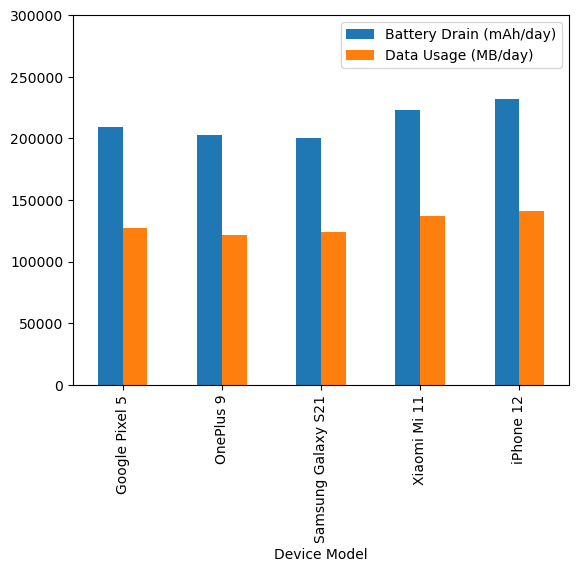

In [14]:
data4.plot(kind='bar')
plt.ylim(0,300000)

In [15]:
data5=data.groupby('Device Model')['Number of Apps Installed'].sum()
data5

Device Model
Google Pixel 5        7087
OnePlus 9             6646
Samsung Galaxy S21    6757
Xiaomi Mi 11          7289
iPhone 12             7698
Name: Number of Apps Installed, dtype: int64

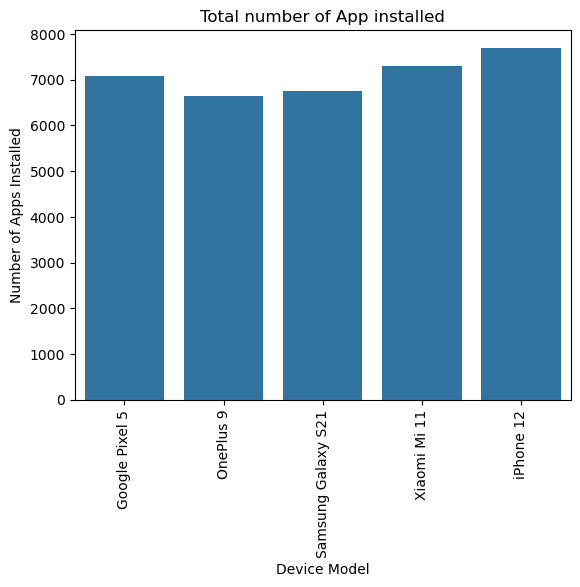

In [16]:
sns.barplot(data=data5)
plt.xticks(rotation=90)
plt.title('Total number of App installed')
plt.show()

In [17]:
data6=data['Device Model'].value_counts()
data6

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

<Axes: title={'center': 'Total number of users using each Devices Model'}, xlabel='Device Model'>

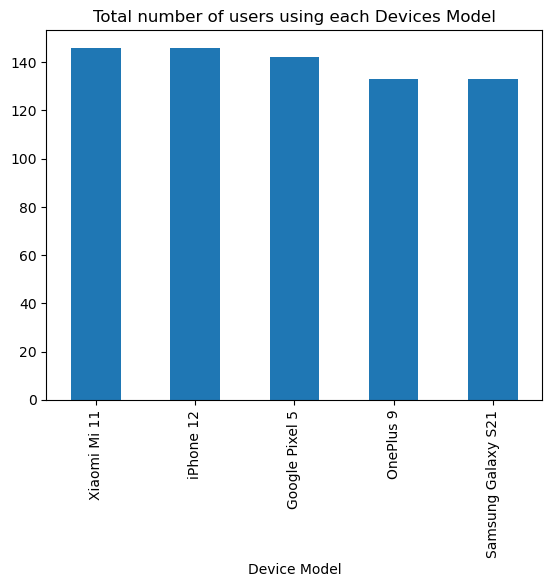

In [18]:
data6.plot(kind='bar', title='Total number of users using each Devices Model')

In [19]:
data7=data['User Behavior Class'].value_counts()
data7

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

<Axes: xlabel='User Behavior Class'>

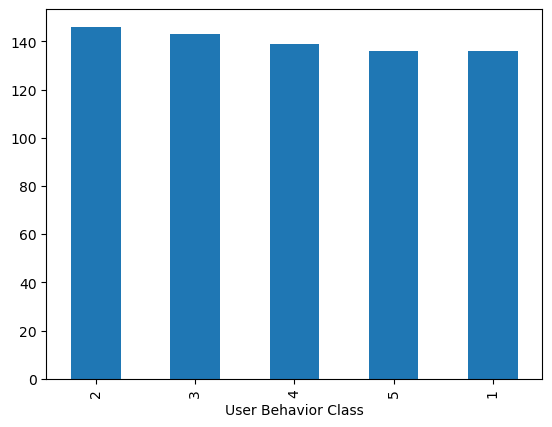

In [20]:
data7.plot(kind='bar')